In [1]:
import pandas as pd
import itables.interactive
from itables import show as ishow
import bokeh
import pandas_bokeh
pandas_bokeh.output_notebook()
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

<IPython.core.display.Javascript object>

Loading BokehJS ...

In [2]:
new_gloadatamix_file \
    = "/home/aj/UKN_network_drives/ag_galizia/AjayramaKumaraswamy/" \
      "Ana_RNPN_SampleSet/IDL_Output/A_5803a/A_5803a.gloDatamix.csv"

old_glodatamix_file \
    = "/home/aj/UKN_network_drives/ag_galizia/AjayramaKumaraswamy/Ana_RNPN_SampleSet/IDL_Output/A_5803a.gloDatamix"

old_glodatamix_header = [
    "NgloTag", "NodorNr", "NOConc", "Nstim_on", "Nstim_off", "NnoFrames", "NframeTime",
    "NrealTime",
    "NphConc", "NshiftX", "NshiftY", "NcontMeasu", "NnumMeasu", "Nstim_ISI", "NodorN",
    "TgloInfo", "Todour", "T_DBB1", "Tcomment", "Tpharma", "TphTime", "Tos9time", "TviewLabel", "Tlabel", "Tanimal",
    "Frame0", "Frame1", "Frame2", "Frame3", "Frame4", "Frame5", "Frame6", "Frame7", "Frame8", "Frame9", "Frame10",
    "Frame11", "Frame12", "Frame13", "Frame14", "Frame15", "Frame16", "Frame17", "Frame18", "Frame19",
    "Frame20", "Frame21", "Frame22", "Frame23", "Frame24", "Frame25", "Frame26", "Frame27", "Frame28",
    "Frame29", "Frame30", "Frame31"
]

# number of rows of DF to show as preview for inspection
preview_rows = 5

# Notes about header
 - I could interpret "NrealTime" values. They were 2, 2, ...
 - "NnumMeasu" has been set to 0 for all rows. Probably useless
 - "NodorN" has been set to 1 for all rows.
 - "TviewLabel" is not equal to measu, but directly related


In [3]:
old_gdm_df = pd.read_csv(old_glodatamix_file, names=old_glodatamix_header, sep="\t")
new_gdm_df = pd.read_csv(new_gloadatamix_file, sep=";")

old_gdm_df.columns = [x.lower() for x in old_gdm_df.columns]
new_gdm_df.columns = [x.lower() for x in new_gdm_df.columns]

old_gdm_df["source"] = "IDL_VIEW"
new_gdm_df["source"] = "pyVIEW"

print("Old DF")
ishow(old_gdm_df)
print("New DF")
ishow(new_gdm_df)

Old DF


nglotag,nodornr,noconc,nstim_on,nstim_off,nnoframes,nframetime,nrealtime,nphconc,nshiftx,frame23,frame24,frame25,frame26,frame27,frame28,frame29,frame30,frame31,source


New DF


nglotag,nodornr,noconc,nstim_on,nstim_off,nnoframes,nframetime,nrealtime,nphconc,nshiftx,frame23,frame24,frame25,frame26,frame27,frame28,frame29,frame30,frame31,source


In [4]:
# use all columns that don't start with "Frame" to create a multilevel index
old_gdm_df_indexed = old_gdm_df.set_index([x for x in old_gdm_df.columns if not x.startswith("frame")])
new_gdm_df_indexed = new_gdm_df.set_index([x for x in new_gdm_df.columns if not x.startswith("frame")])

print("Old DF")
ishow(old_gdm_df_indexed)
print("New DF")
ishow(new_gdm_df_indexed)

Old DF


,,,,,,,,,,,,,,,,,,,,,,,,,,frame0,frame1,frame2,frame3,frame4,frame5,frame6,frame7,frame8,frame9,frame22,frame23,frame24,frame25,frame26,frame27,frame28,frame29,frame30,frame31
nglotag,nodornr,noconc,nstim_on,nstim_off,nnoframes,nframetime,nrealtime,nphconc,nshiftx,nshifty,ncontmeasu,nnummeasu,nstim_isi,nodorn,tgloinfo,todour,t_dbb1,tcomment,tpharma,tphtime,tos9time,tviewlabel,tlabel,tanimal,source,,,,,,,,,,,,,,,,,,,,


New DF


,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,frame0,frame1,frame2,frame3,frame4,frame5,frame6,frame7,frame8,frame9,frame22,frame23,frame24,frame25,frame26,frame27,frame28,frame29,frame30,frame31
nglotag,nodornr,noconc,nstim_on,nstim_off,nnoframes,nframetime,nrealtime,nphconc,nshiftx,nshifty,ncontmeasu,nnummeasu,nstim_isi,nodorn,nstim2on,nstim2off,nage,nagemax,tgloinfo,todour,t_dbb1,tcomment,tpharma,tphtime,tos9time,tviewlabel,tlabel,tanimal,t_dbb2,ctv_ctv222,source,,,,,,,,,,,,,,,,,,,,


In [5]:
# [x for x in old_gdm_df.columns if x.startswith("Frame")]
old_gdm_df_indexed.index

MultiIndex([(10,    0, -2, 11, 14, 32, 250,  2, 0, 0, 0, 0, 0, 0, 1, ...),
            ( 2,    0, -2, 11, 14, 32, 250,  2, 0, 0, 0, 0, 0, 0, 1, ...),
            ( 8,    0, -2, 11, 14, 32, 250,  2, 0, 0, 0, 0, 0, 0, 1, ...),
            ( 1,    0, -2, 11, 14, 32, 250,  2, 0, 0, 0, 0, 0, 0, 1, ...),
            ( 4,    0, -2, 11, 14, 32, 250,  2, 0, 0, 0, 0, 0, 0, 1, ...),
            ( 5,    0, -2, 11, 14, 32, 250,  2, 0, 0, 0, 0, 0, 0, 1, ...),
            (33,    0, -2, 11, 14, 32, 250,  2, 0, 0, 0, 0, 0, 0, 1, ...),
            (10,    1, -2, 11, 14, 32, 250,  4, 0, 0, 0, 0, 0, 0, 1, ...),
            ( 2,    1, -2, 11, 14, 32, 250,  4, 0, 0, 0, 0, 0, 0, 1, ...),
            ( 8,    1, -2, 11, 14, 32, 250,  4, 0, 0, 0, 0, 0, 0, 1, ...),
            ...
            ( 4, -999, -2, 11, 14, 32, 250, 51, 0, 0, 0, 0, 0, 0, 1, ...),
            ( 5, -999, -2, 11, 14, 32, 250, 51, 0, 0, 0, 0, 0, 0, 1, ...),
            (33, -999, -2, 11, 14, 32, 250, 51, 0, 0, 0, 0, 0, 0, 1, ...),
         

In [6]:
# assign name to axis, this will make sure that the new index level has a name after the stacking operation below.
old_gdm_df_indexed.rename_axis('Frame Number', axis=1, inplace=True)
new_gdm_df_indexed.rename_axis('Frame Number', axis=1, inplace=True)

# stack all columns that start with "Frame" to create a new index level called "Frame Number"
old_gdm_s_longform = old_gdm_df_indexed.stack()
new_gdm_s_longform = new_gdm_df_indexed.stack()

# name the new column and reset index
old_gdm_s_longform.name = "Value"
old_gdm_df_longform = old_gdm_s_longform.reset_index()

new_gdm_s_longform.name = "Value"
new_gdm_df_longform = new_gdm_s_longform.reset_index()

print("Old DF")
ishow(old_gdm_df_longform)
print("New DF")
ishow(new_gdm_df_longform)

Old DF


,nglotag,nodornr,noconc,Frame Number,Value


New DF


,nglotag,nodornr,noconc,Frame Number,Value


In [7]:
print(old_gdm_df_longform.columns)
print(old_gdm_df_longform["nglotag"].unique())
print(new_gdm_df_longform["nglotag"].unique())

Index(['nglotag', 'nodornr', 'noconc', 'nstim_on', 'nstim_off', 'nnoframes',
       'nframetime', 'nrealtime', 'nphconc', 'nshiftx', 'nshifty',
       'ncontmeasu', 'nnummeasu', 'nstim_isi', 'nodorn', 'tgloinfo', 'todour',
       't_dbb1', 'tcomment', 'tpharma', 'tphtime', 'tos9time', 'tviewlabel',
       'tlabel', 'tanimal', 'source', 'Frame Number', 'Value'],
      dtype='object')
[10  2  8  1  4  5 33]
[10  2  8  1  4  5 33]


In [8]:
# concatenate the dataframes
df_longform = pd.concat((old_gdm_df_longform, new_gdm_df_longform), axis=0, ignore_index=True)

df_longform["Frame Number"] = [int(x[5:]) for x in df_longform["Frame Number"].values]
df_longform["nglotag"] = [f"glo{x}" for x in df_longform["nglotag"].values]

# pivot table
df_pivoted = pd.pivot(
    data=df_longform, 
    index=["tlabel", 'nglotag', "Frame Number", "todour", "noconc"], 
    columns="source", values="Value")

df_pivoted.reset_index(inplace=True)


ishow(df_pivoted)


source,tlabel,nglotag,pyVIEW


In [9]:
plots = []

for measu_label, measu_df in df_pivoted.groupby("tlabel"):
    
    first_row = measu_df.iloc[0]
    
    # plot a scatter of IDL_VIEW values vs pyVIEW values, coloring based on Frame Number
    p_scatter_colored_frame_number = measu_df.plot_bokeh.scatter(
        x="IDL_VIEW", y="pyVIEW", category="Frame Number", 
        title=f"Label={first_row['tlabel']}, Stimulus={first_row['todour']}@{first_row['noconc']}", 
        show_figure=False, xlim=(-6, 16), ylim=(-0.06, 0.16)
    )

    # plot a scatter of IDL_VIEW values vs pyVIEW values, coloring based on glomerulus
    p_scatter_colored_glomerulus = measu_df.plot_bokeh.scatter(
        x="IDL_VIEW", y="pyVIEW", category="nglotag", 
        title=f"Label={first_row['tlabel']}, Stimulus={first_row['todour']}@{first_row['noconc']}",
        show_figure=False, xlim=(-6, 16), ylim=(-0.06, 0.16)
    )
    
    plots.append([p_scatter_colored_frame_number, p_scatter_colored_glomerulus])

# place plots next to one another
grid = pandas_bokeh.plot_grid(plots, plot_width=800)



/home/aj/Installations/anaconda3/envs/view/lib/python3.7/site-packages/pandas_bokeh/plot.py:1332: UserWarning: There are more than 5 categories in the scatterplot. The legend might be crowded, to hide the axis you can pass 'legend=False' as an optional argument.
  "There are more than 5 categories in the scatterplot. The legend might be crowded, to hide the axis you can pass 'legend=False' as an optional argument."


In [10]:
bokeh.io.save(grid, "/tmp/GDM_comparison_old_new_A_5803.html", resources="inline")

/home/aj/Installations/anaconda3/envs/view/lib/python3.7/site-packages/bokeh/io/saving.py:140: UserWarning: save() called but no title was supplied and output_file(...) was never called, using default title 'Bokeh Plot'
  warn("save() called but no title was supplied and output_file(...) was never called, using default title 'Bokeh Plot'")


'/tmp/GDM_comparison_old_new_A_5803.html'

In [11]:
df_pivoted.columns


Index(['tlabel', 'nglotag', 'Frame Number', 'todour', 'noconc', 'IDL_VIEW',
       'pyVIEW'],
      dtype='object', name='source')

Figure(id='15821', ...)

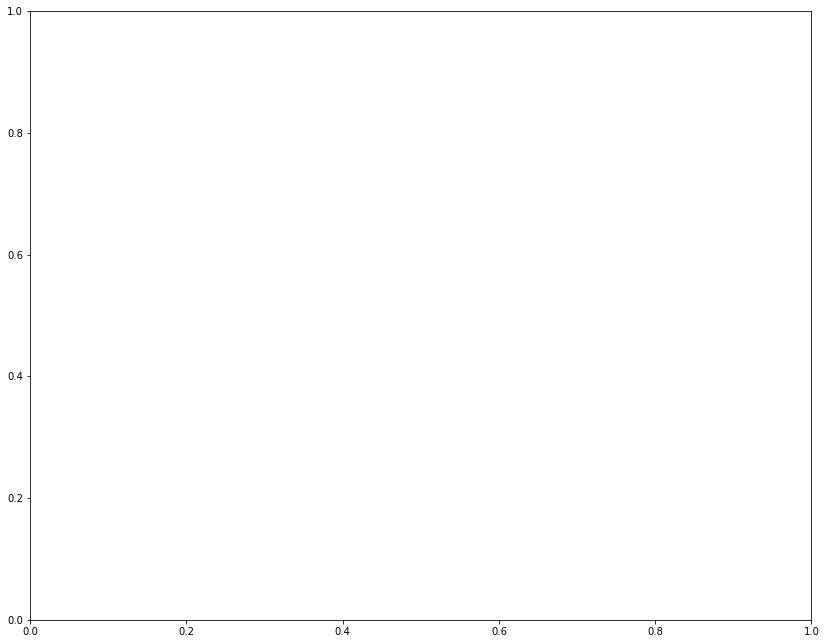

In [12]:
from matplotlib import pyplot as plt
nglotag = "glo5"
tlabel = "Long05"
fig, ax = plt.subplots(figsize=(14, 11.2))
df_pivoted_indexed = df_pivoted.set_index(['tlabel', 'nglotag'])
df_subset = df_pivoted_indexed.loc[(tlabel, nglotag), ["IDL_VIEW", "pyVIEW", "Frame Number"]]
df_subset["pyVIEW"] *= 100
df_subset_index = df_subset.set_index("Frame Number")
# ishow(df_subset_index)
df_subset_index.plot_bokeh(kind="line")
